<a href="https://www.kaggle.com/code/dataanecdotes/eda-try?scriptVersionId=126879973" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance/StudentsPerformance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/kaggle/input/student-performance/StudentsPerformance.csv')
df.tail()
df.shape
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
cat_col = [fea for fea in df.columns if df[fea].dtype == "O"]
num_col = [fea for fea in df.columns if df[fea].dtype != "O"]

In [5]:
df[num_col]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [6]:
df.memory_usage()

Index                           128
gender                         8000
race/ethnicity                 8000
parental level of education    8000
lunch                          8000
test preparation course        8000
math score                     8000
reading score                  8000
writing score                  8000
dtype: int64

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [11]:
df.corr()
#According to this it means that reading score improves along with the writing score

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


In [12]:
df.cov()

,math score,reading score,writing score
math score,229.918998,180.998958,184.939133
reading score,180.998958,213.165605,211.786661
writing score,184.939133,211.786661,230.907992


In [13]:
df.skew()

math score      -0.278935
reading score   -0.259105
writing score   -0.289444
dtype: float64

<AxesSubplot:xlabel='math score', ylabel='Density'>

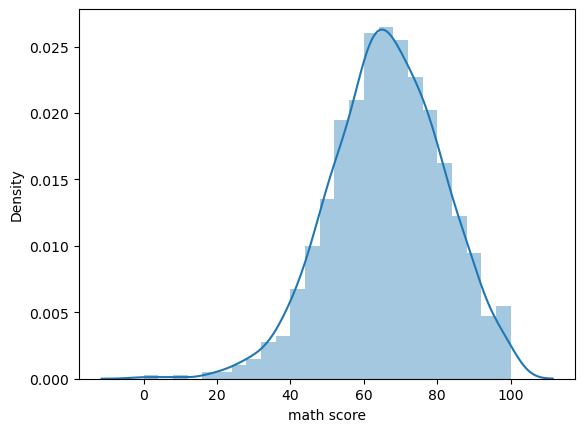

In [14]:
sns.distplot(df['math score'])

In [15]:
df.groupby('gender').mean()
c=0
for i in range(len(df)):
    if(df.at[i,'math score'] < 30):
        c+=1
print(c)

14


In [16]:
#Same answer different query
df[df["math score"]<30].count()

gender                         14
race/ethnicity                 14
parental level of education    14
lunch                          14
test preparation course        14
math score                     14
reading score                  14
writing score                  14
dtype: int64

<AxesSubplot:xlabel='math score', ylabel='Density'>

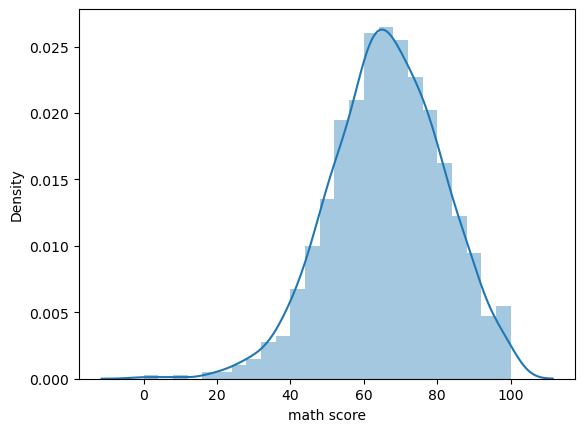

In [17]:
a = df[num_col]
from scipy.stats import normaltest
n = normaltest(df['math score'])
n[1]*100

sns.distplot(df['math score'])

<AxesSubplot:>

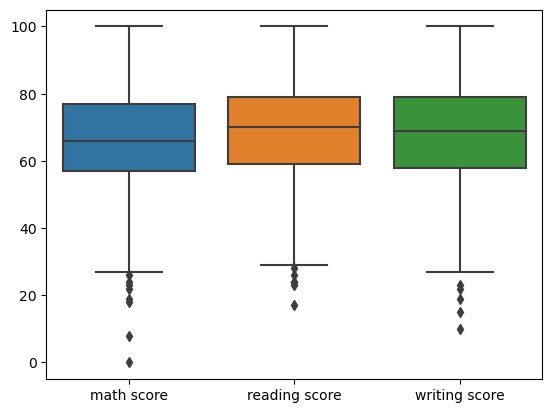

In [18]:
#finding outlirs
sns.boxplot(df[num_col])

In [19]:
q1 = df['math score'].quantile(0.25)

In [20]:
q3 = df['math score'].quantile(0.75)

In [21]:
IQR = q3 - q1

In [22]:
upper_limit = q3 + (1.5*IQR)
lower_limit = q1 - (1.5*IQR)
def outlier_threshold(df,var):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    IQR = q3-q1
    up_limit = q3+(1.5*IQR)
    low_limit = q1-(1.5*IQR)
    return up_limit,low_limit

In [23]:
data_num = df[num_col]
for var in data_num.columns:
    low_limit, up_limit = outlier_threshold(data_num,var)

In [24]:
def replace_with_threshold(df,numeric_col):
    for var in data_num.columns:
        low_limit, upper_limit = outlier_threshold(data_num,var)
        data_num.loc[df[var]<low_limit,var] = low_limit
        data_num.loc[df[var]>up_limit,var] = up_limit
        return low_limit,up_limit

In [25]:
df2 = replace_with_threshold(df,data_num.columns)

In [26]:
data_num

,math score,reading score,writing score
0,25.875,72,74
1,25.875,90,88
2,25.875,95,93
3,25.875,57,44
4,25.875,78,75
...,...,...,...
995,25.875,99,95
996,25.875,55,55
997,25.875,71,65
998,25.875,78,77


In [27]:
data_num.loc[data_num['math score']<lower_limit,'math score']

0      25.875
1      25.875
2      25.875
3      25.875
4      25.875
        ...  
995    25.875
996    25.875
997    25.875
998    25.875
999    25.875
Name: math score, Length: 993, dtype: float64

In [28]:
data_num.loc[data_num['math score']<low_limit,'math score'] = low_limit

In [29]:
data_num

,math score,reading score,writing score
0,110.875,72,74
1,110.875,90,88
2,110.875,95,93
3,110.875,57,44
4,110.875,78,75
...,...,...,...
995,110.875,99,95
996,110.875,55,55
997,110.875,71,65
998,110.875,78,77


In [30]:
print(df)

     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [31]:
df_group = df.groupby('gender').mean()

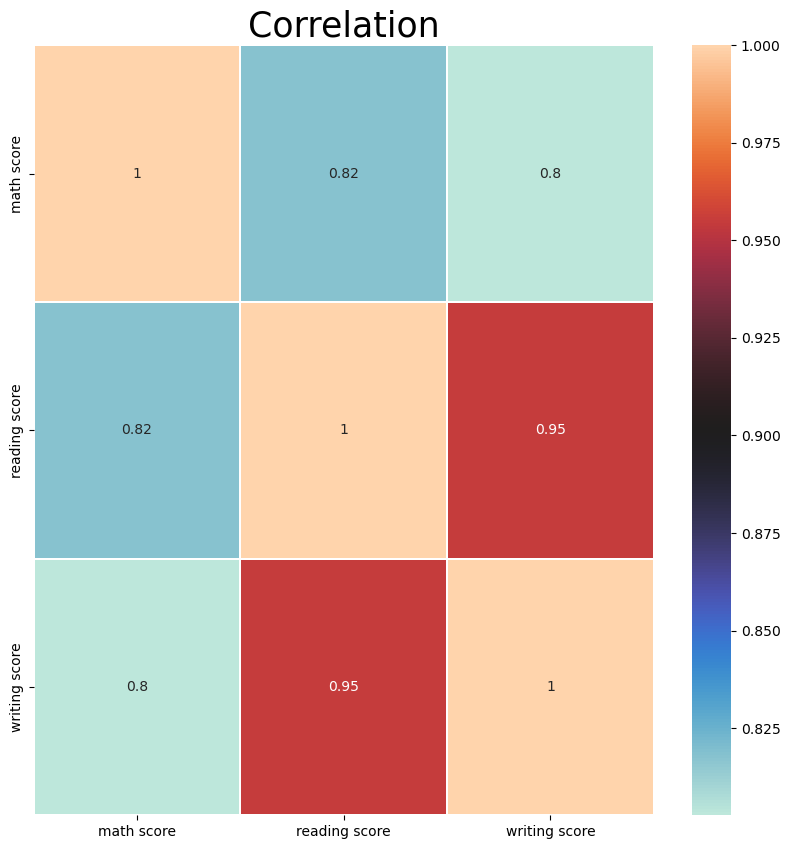

In [32]:
sns.heatmap(df.corr(),annot = True,cmap = 'icefire', linewidths = 0.3)
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title("Correlation",color='black',size = 25)
plt.show()

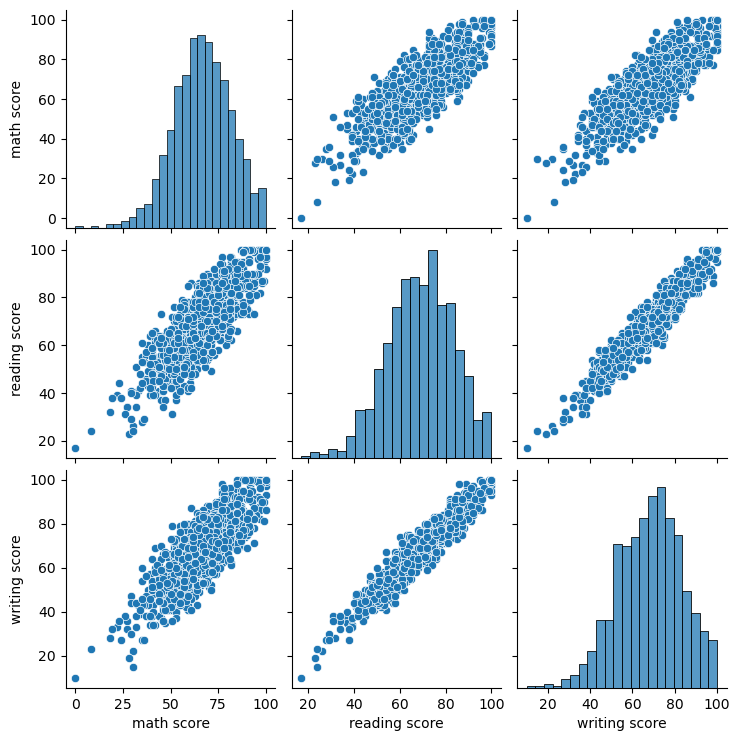

In [33]:
sns.pairplot(df)

<AxesSubplot:>

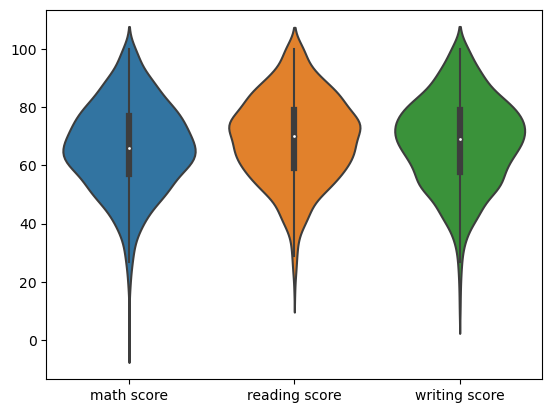

In [34]:
sns.violinplot(data=df)